# Sparse and Non Negative Shallow Auto Encoder without AMD
* Sparsity Regularizer : Difference between Hoyer sparsity measure and objective value (0.6).
* Non-Negativity Regularizer : Non Negativity Constraint
* Number of epochs for training: 500 epochs
* Activation of the encoder: Sigmoid
* Activation of the decoder: LeakyRELU (useless in case of Non-Negativity)
## Impact of the value of the sparsity parameters
* Sparsity objective: 0.6
* Sparsity weight: 0.1, 0.5, 1, 5



In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
from shallowAE import ShallowAE
from nonNegSparseShallowAE import Sparse_NonNeg_ShallowAE_Hoyer_NonNegConstraint
import datetime
import morphoMaths
import keras
import pandas as pd
keras.__version__

Using TensorFlow backend.


'2.2.0'

In [2]:
FILE_PATH = "../"
x_test, _ = bastien_utils.load_data(FILE_PATH, train=False, test=True, subsetTest=False)
x_small = x_test[:10]
x_small[2] = x_test[31]
print('x_small shape:', x_small.shape)

x_small shape: (10, 28, 28, 1)


In [3]:
results = pd.read_csv("../Results/ShallowAE/Sparse_NonNeg/Hoyer_NonNegConstraint/TestOutputs/18_10_29results")
results

,Unnamed: 0,sparsity_objective,sparsity_weight,test_error,test_kl_loss,test_max_approx_error_toOriginal_dilatation,test_max_approx_error_toRec_dilatation,test_sparsity,training_error,training_kl_loss,training_max_approx_error_toOriginal_dilatation,training_max_approx_error_toRec_dilatation,training_sparsity
0,0,0.6,0.1,0.017642,0.000579,0.980079,0.994004,0.601668,0.017626,0.000581,0.977980,0.991764,0.601735
1,1,0.6,0.5,0.019196,0.001389,1.086980,1.194525,0.601616,0.019188,0.001357,1.085599,1.192224,0.601646
2,2,0.6,1.0,0.022456,0.001341,1.416636,1.433118,0.599664,0.022465,0.001286,1.414230,1.430726,0.599671
3,3,0.6,5.0,0.032943,0.017097,1.395289,1.543893,0.603384,0.033067,0.017107,1.392299,1.540685,0.603384


In [4]:
max_values = results.max(axis=0)
max_idx = results.idxmax()
min_values = results.min(axis=0)
min_idx = results.idxmin()
median_values = results.median()
std_values = results.std()
sparsity_objectives = results['sparsity_objective']
sparsity_weights = results['sparsity_weight']

In [5]:

print('***********************Maximum values**********************')
print(max_values[1:])
print('\n')
print('***********************Minimum values**********************')
print(min_values[1:])
print('\n')
print('***********************Median values**********************')
print(median_values[1:])


***********************Maximum values**********************
sparsity_objective                                 0.600000
sparsity_weight                                    5.000000
test_error                                         0.032943
test_kl_loss                                       0.017097
test_max_approx_error_toOriginal_dilatation        1.416636
test_max_approx_error_toRec_dilatation             1.543893
test_sparsity                                      0.603384
training_error                                     0.033067
training_kl_loss                                   0.017107
training_max_approx_error_toOriginal_dilatation    1.414230
training_max_approx_error_toRec_dilatation         1.540685
training_sparsity                                  0.603384
dtype: float64


***********************Minimum values**********************
sparsity_objective                                 0.600000
sparsity_weight                                    0.100000
test_error             

In [6]:
print('\033[1m'+'Lowest error: '+'\033[0m' , round(min_values['test_error'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_error']], ', sparsity_weight=', sparsity_weights[min_idx['test_error']], '\n')
print('\033[1m'+'Highest error: '+'\033[0m', round(max_values['test_error'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_error']], ', sparsity_weight=', sparsity_weights[max_idx['test_error']], '\n')
print('\033[1m'+'Least sparse: '+'\033[0m' , round(min_values['test_sparsity'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_sparsity']], ', sparsity_weight=', sparsity_weights[min_idx['test_sparsity']], '\n')
print('\033[1m'+'Most sparse: '+'\033[0m', round(max_values['test_sparsity'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_sparsity']], ', sparsity_weight=', sparsity_weights[max_idx['test_sparsity']], '\n')
print('\033[1m'+'Lowest Max-approximation error to dilatation of the originals: '+'\033[0m' , round(min_values['test_max_approx_error_toOriginal_dilatation'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_max_approx_error_toOriginal_dilatation']], ', sparsity_weight=', sparsity_weights[min_idx['test_max_approx_error_toOriginal_dilatation']], '\n')
print('\033[1m'+'Highest  Max-approximation error to dilatation of the originals: '+'\033[0m', round(max_values['test_max_approx_error_toOriginal_dilatation'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_max_approx_error_toOriginal_dilatation']], ', sparsity_weight=', sparsity_weights[max_idx['test_max_approx_error_toOriginal_dilatation']], '\n')
print('\033[1m'+'Lowest KL-loss: '+'\033[0m' , round(min_values['test_kl_loss'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_kl_loss']], ', sparsity_weight=', sparsity_weights[min_idx['test_kl_loss']], '\n')
print('\033[1m'+'Highest KL-loss: '+'\033[0m', round(max_values['test_kl_loss'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_kl_loss']], ', sparsity_weight=', sparsity_weights[max_idx['test_kl_loss']], '\n')
print('\033[1m'+'Lowest max-approximation error to dilatation of the reconstruction: '+'\033[0m' , round(min_values['test_max_approx_error_toRec_dilatation'], 5), ', sparsity_objective=',sparsity_objectives[min_idx['test_max_approx_error_toRec_dilatation']], ', sparsity_weight=', sparsity_weights[min_idx['test_max_approx_error_toRec_dilatation']], '\n')
print('\033[1m'+'Highest max-approximation error to dilatation of the reconstruction: '+'\033[0m', round(max_values['test_max_approx_error_toRec_dilatation'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_max_approx_error_toRec_dilatation']], ', sparsity_weight=', sparsity_weights[max_idx['test_max_approx_error_toRec_dilatation']], '\n')


Lowest error:  0.0176 , sparsity_objective= 0.6 , sparsity_weight= 0.1 

Highest error:  0.0329 , sparsity_objective= 0.6 , sparsity_weight= 5.0 

Least sparse:  0.5997 , sparsity_objective= 0.6 , sparsity_weight= 1.0 

Most sparse:  0.6034 , sparsity_objective= 0.6 , sparsity_weight= 5.0 

Lowest Max-approximation error to dilatation of the originals:  0.9801 , sparsity_objective= 0.6 , sparsity_weight= 0.1 

Highest  Max-approximation error to dilatation of the originals:  1.4166 , sparsity_objective= 0.6 , sparsity_weight= 1.0 

Lowest KL-loss:  0.0006 , sparsity_objective= 0.6 , sparsity_weight= 0.1 

Highest KL-loss:  0.0171 , sparsity_objective= 0.6 , sparsity_weight= 5.0 

Lowest max-approximation error to dilatation of the reconstruction:  0.994 , sparsity_objective= 0.6 , sparsity_weight= 0.1 

Highest max-approximation error to dilatation of the reconstruction:  1.5439 , sparsity_objective= 0.6 , sparsity_weight= 5.0 



Nb:
* Lowest error reached with weakest sparsity constraints.
* Highest error reached with strongest sparsity constraints.
* All get quite low error.
* All get sparsity metric close to 0.6
* Lowest max-approximation error to dilatation of the originals and of the reconstruction reached with the weakest sparsity constraint ! ! ! 

In [7]:
sparsity_objectives = np.load('../Results/ShallowAE/Sparse_NonNeg/Hoyer_NonNegConstraint/TestOutputs/18_10_29_sparsityObjectives_dim100.npy')
sparsity_weights = np.load('../Results/ShallowAE/Sparse_NonNeg/Hoyer_NonNegConstraint/TestOutputs/18_10_29_sparsityWeights_dim100.npy')
test_mse = np.load('../Results/ShallowAE/Sparse_NonNeg/Hoyer_NonNegConstraint/TestOutputs/18_10_29_test_errors_dim100.npy')
train_mse = np.load('../Results/ShallowAE/Sparse_NonNeg/Hoyer_NonNegConstraint/TestOutputs/18_10_29_training_errors_dim100.npy')
test_kl_loss = np.load('../Results/ShallowAE/Sparse_NonNeg/Hoyer_NonNegConstraint/TestOutputs/18_10_29_test_kl_loss_dim100.npy')
train_kl_loss = np.load('../Results/ShallowAE/Sparse_NonNeg/Hoyer_NonNegConstraint/TestOutputs/18_10_29_training_kl_loss_dim100.npy')
test_max_approx_to_Original = np.load('../Results/ShallowAE/Sparse_NonNeg/Hoyer_NonNegConstraint/TestOutputs/18_10_29_test_max_approx_error_toOriginal_dilation_dim100.npy')
train_max_approx_to_Original = np.load('../Results/ShallowAE/Sparse_NonNeg/Hoyer_NonNegConstraint/TestOutputs/18_10_29_training_max_approx_error_toOriginal_dilatation_dim100.npy')
test_max_approx_to_Rec = np.load('../Results/ShallowAE/Sparse_NonNeg/Hoyer_NonNegConstraint/TestOutputs/18_10_29_test_max_approx_error_toRec_dilation_dim100.npy')
train_max_approx_to_Rec = np.load('../Results/ShallowAE/Sparse_NonNeg/Hoyer_NonNegConstraint/TestOutputs/18_10_29_training_max_approx_error_toRec_dilatation_dim100.npy')
test_sparsity = np.load('../Results/ShallowAE/Sparse_NonNeg/Hoyer_NonNegConstraint/TestOutputs/18_10_29_test_sparsity_dim100.npy')
train_sparsity = np.load('../Results/ShallowAE/Sparse_NonNeg/Hoyer_NonNegConstraint/TestOutputs/18_10_29_training_sparsity_dim100.npy')

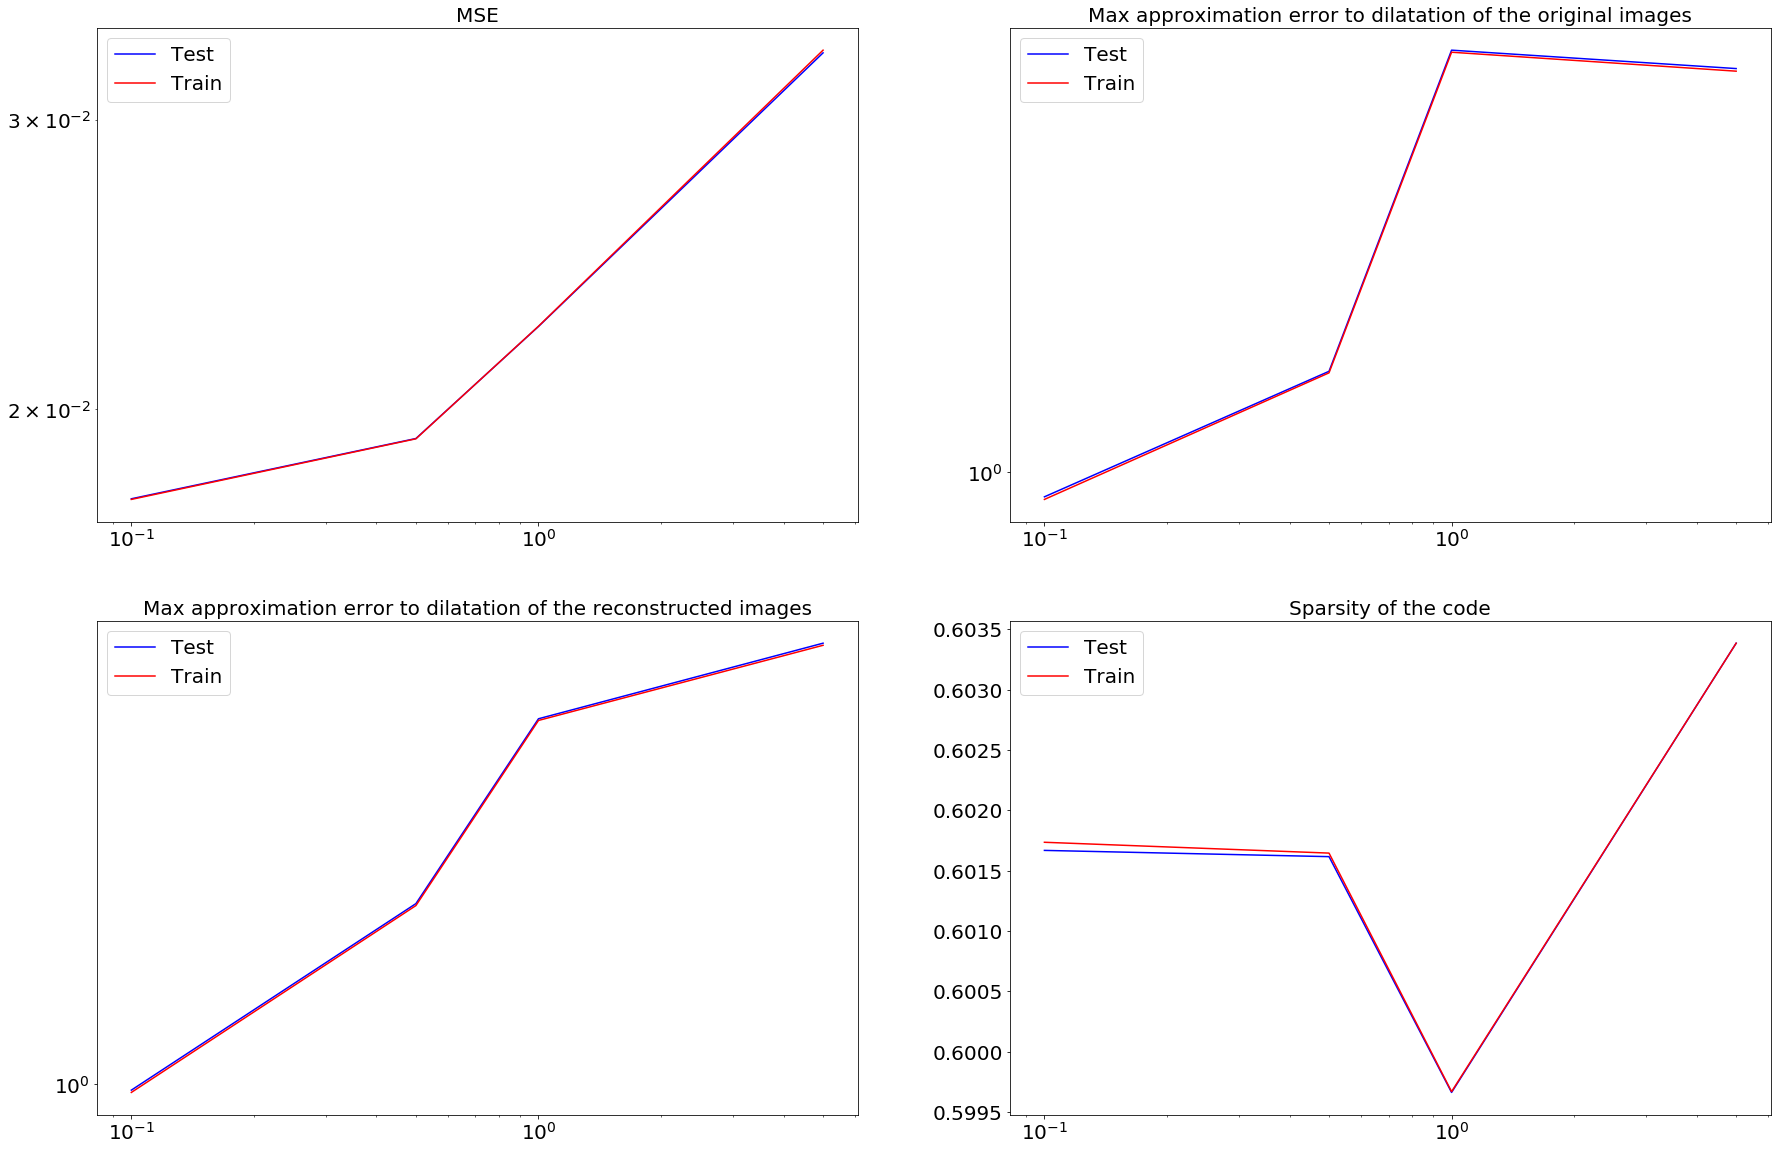

In [8]:
plt.figure(figsize=(30,20))
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20) 
ax = plt.subplot(2, 2, 1)
ax.plot(sparsity_weights, test_mse[:,0], 'b')
ax.plot(sparsity_weights, train_mse[:,0], 'r')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Test', 'Train'])
ax.set_title('MSE')

ax = plt.subplot(2, 2, 2)
ax.plot(sparsity_weights, test_max_approx_to_Original[:,0], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,0], 'r')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Test', 'Train'])
ax.set_title('Max approximation error to dilatation of the original images')

ax = plt.subplot(2, 2, 3)
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,0], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,0], 'r')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Test', 'Train'])
ax.set_title('Max approximation error to dilatation of the reconstructed images')


ax = plt.subplot(2, 2, 4)
ax.plot(sparsity_weights, test_sparsity[:,0], 'b')
ax.plot(sparsity_weights, train_sparsity[:,0], 'r')
ax.set_xscale('log')
ax.legend(['Test', 'Train'])
ax.set_title('Sparsity of the code')

plt.show()

# 1. Sparsity_Objective = 0.06

## 1.1 Sparsity_weight = 0.1 (sp_o = 0.06)

Original images and reconstructions - Reconstruction error:  0.01764215158224106


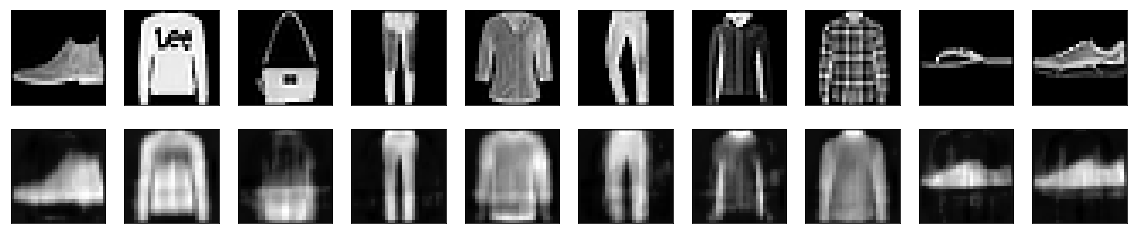

Histograms of the encodings - Sparsity (Hoyer):  0.6016680598258972


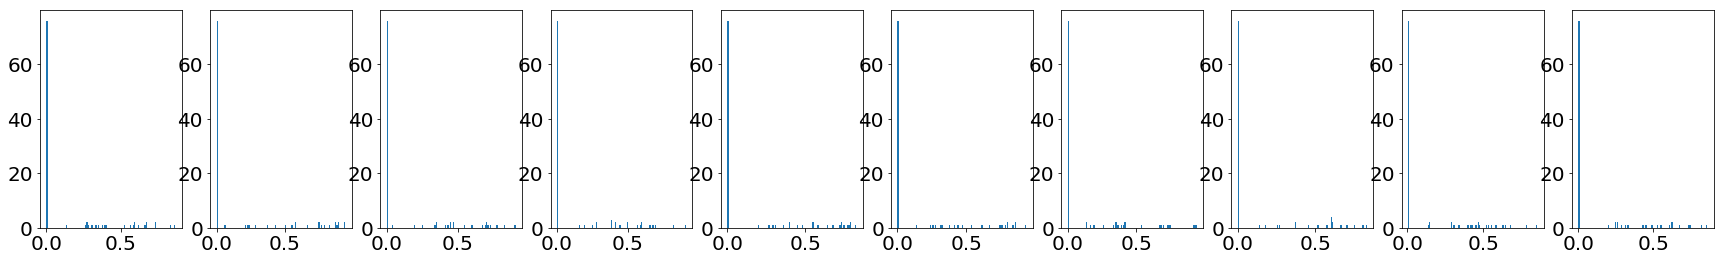

Atom images of the decoder


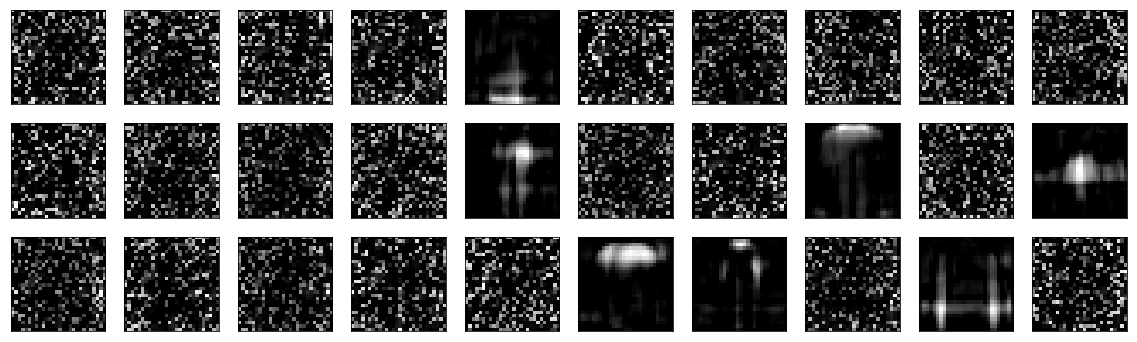

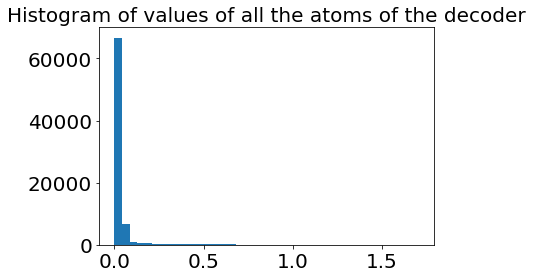

In [9]:
i = np.arange(4)[sparsity_weights==0.1][0]
j = np.arange(1)[sparsity_objectives==0.6][0]
AE = Sparse_NonNeg_ShallowAE_Hoyer_NonNegConstraint.load('18_10_29_dim100_Hoyer_0.1_0.6_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


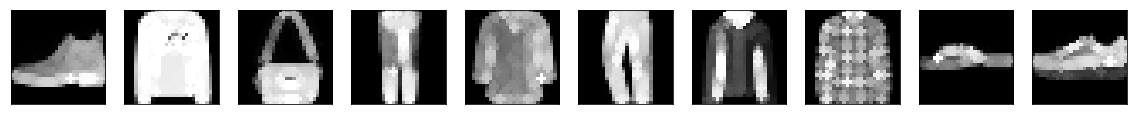

Dilatation of the reconstructions


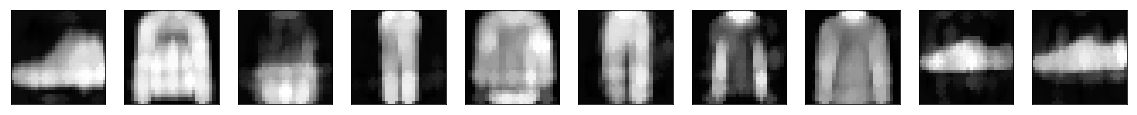

Original images and max-approximation to dilatation
Max-approx error to original:  0.9800793591499328  - Max-approx error to reconstruction:  0.9940044501304627


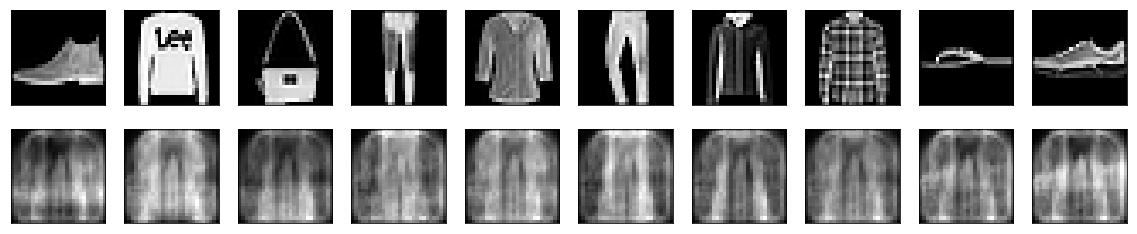

Dilated of the atom images of the decoder


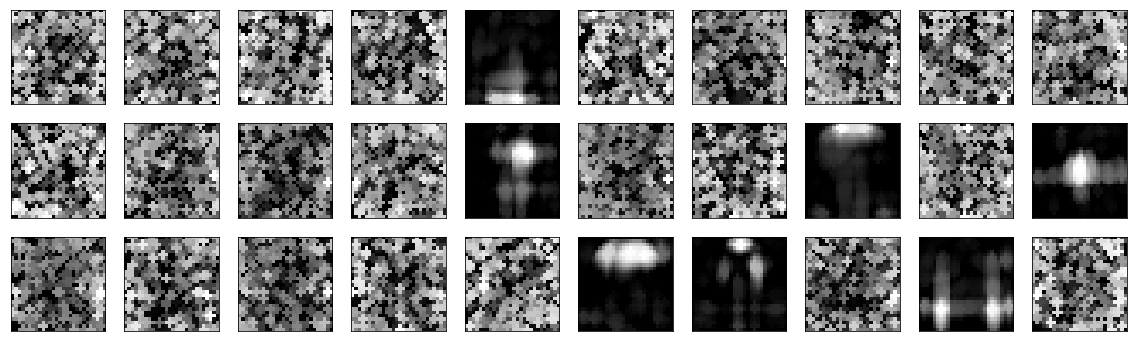

In [10]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.2 Sparsity_weight = 0.5 (sp_o = 0.6)

Original images and reconstructions - Reconstruction error:  0.019195873019099235


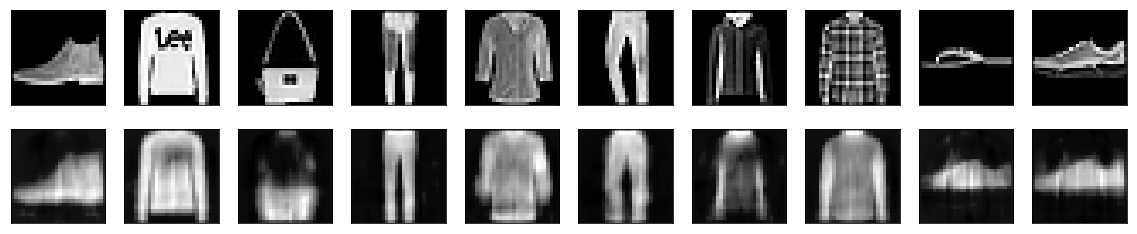

Histograms of the encodings - Sparsity (Hoyer):  0.6016163229942322


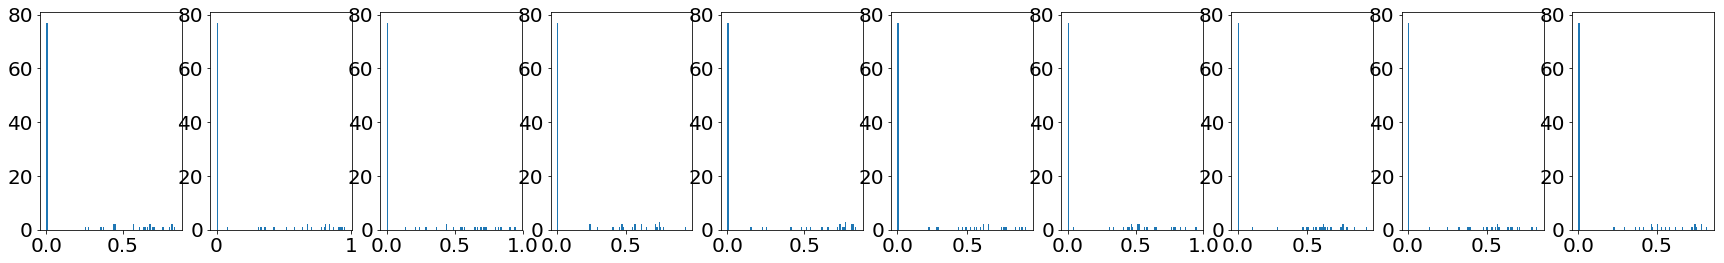

Atom images of the decoder


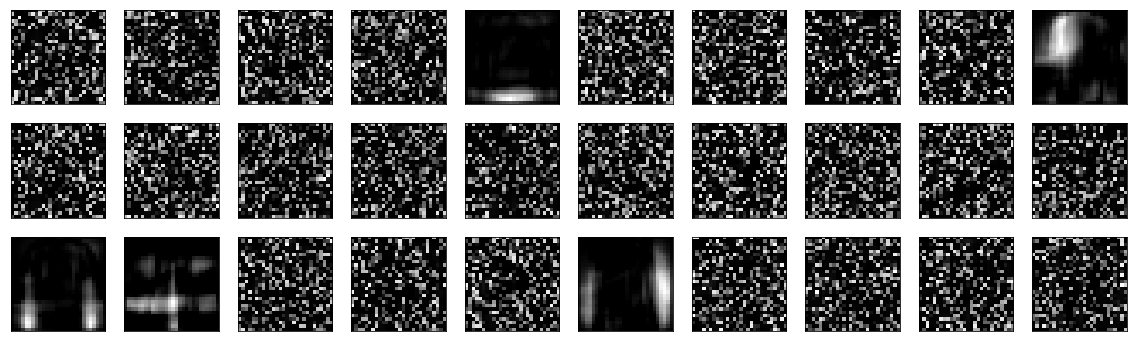

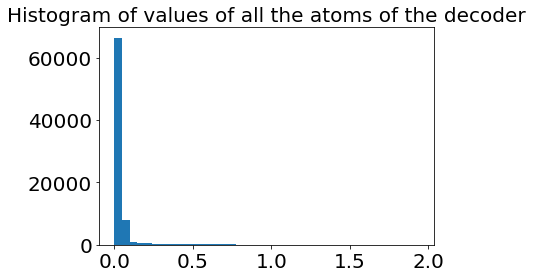

In [13]:
sp_o = 0.6
sp_w = 0.5
i = np.arange(4)[sparsity_weights==sp_w][0]
j = np.arange(1)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_Hoyer_NonNegConstraint.load('18_10_29_dim100_Hoyer_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


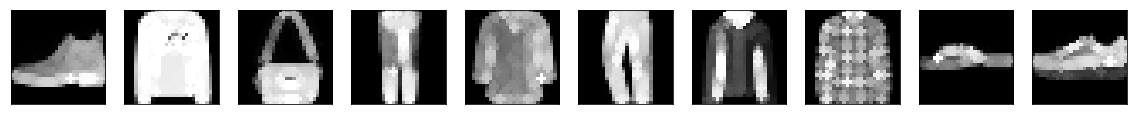

Dilatation of the reconstructions


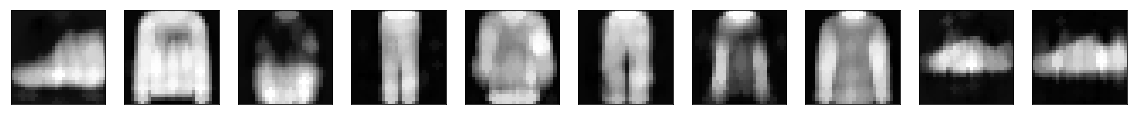

Original images and max-approximation to dilatation
Max-approx error to original:  1.0869801538467407  - Max-approx error to reconstruction:  1.1945254077911378


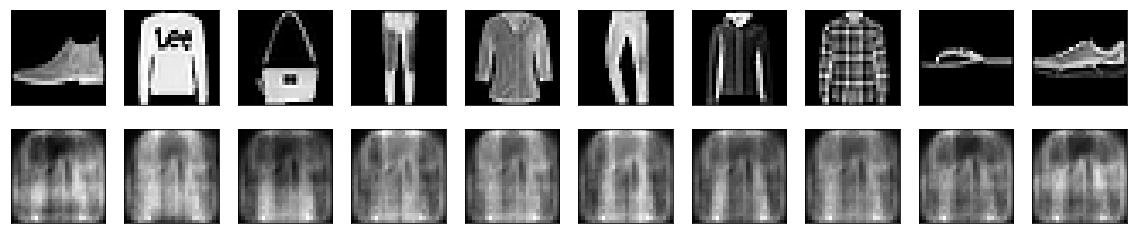

Dilated of the atom images of the decoder


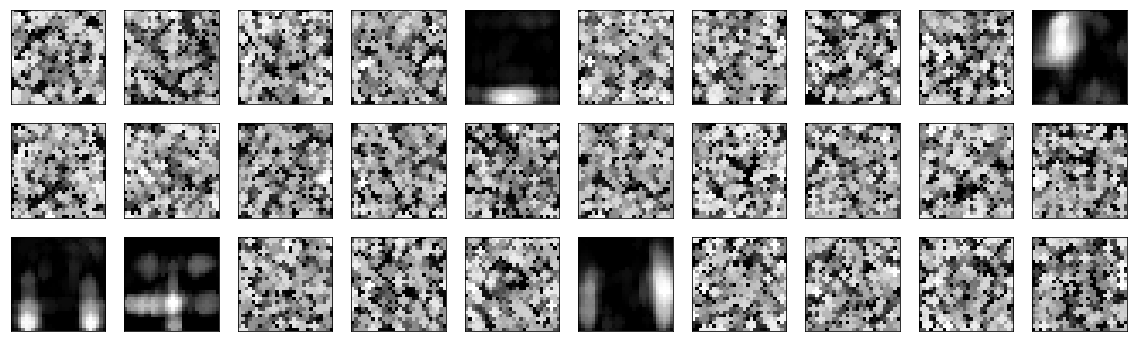

In [14]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.3 Sparsity_weight = 1 (sp_o = 0.6)

Original images and reconstructions - Reconstruction error:  0.0224564274340868


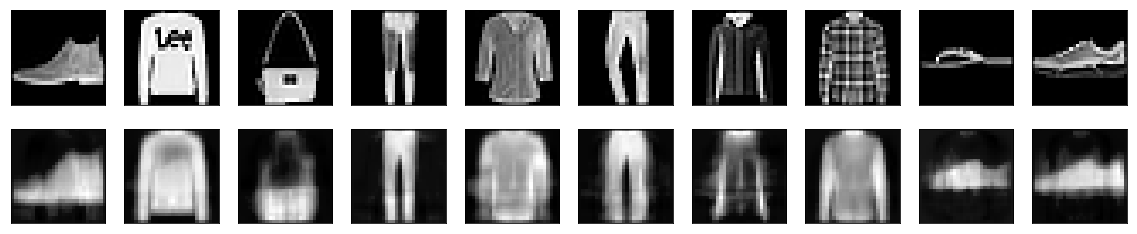

Histograms of the encodings - Sparsity (Hoyer):  0.5996637940406799


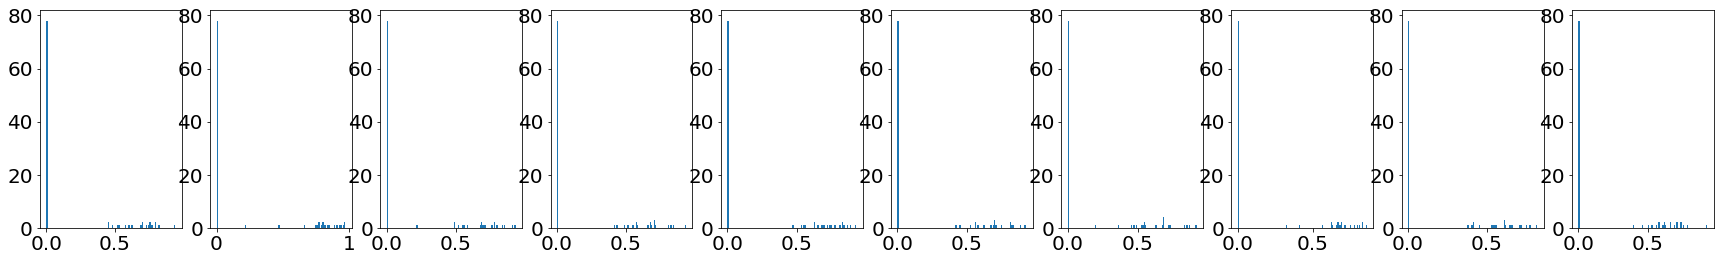

Atom images of the decoder


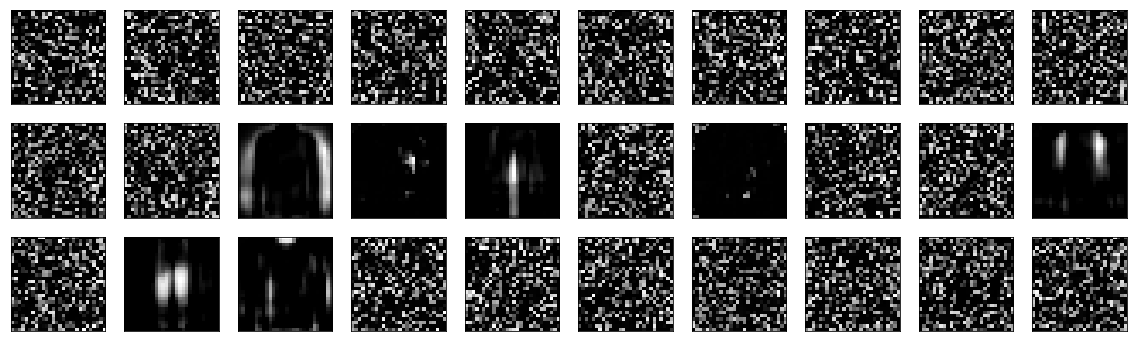

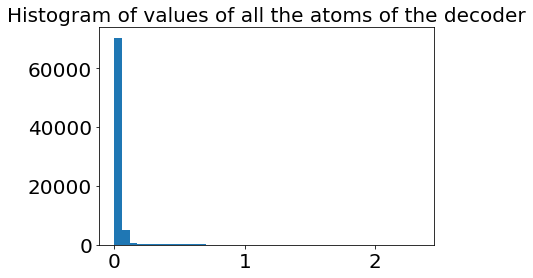

In [15]:
sp_o = 0.6
sp_w = 1
i = np.arange(4)[sparsity_weights==sp_w][0]
j = np.arange(1)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_Hoyer_NonNegConstraint.load('18_10_29_dim100_Hoyer_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


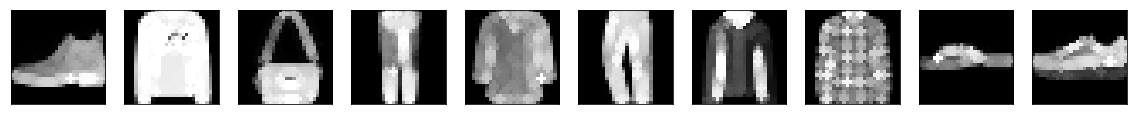

Dilatation of the reconstructions


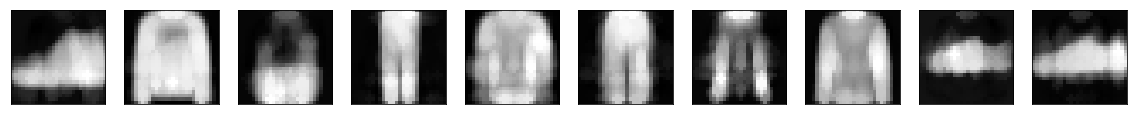

Original images and max-approximation to dilatation
Max-approx error to original:  1.416635800743103  - Max-approx error to reconstruction:  1.4331183563232421


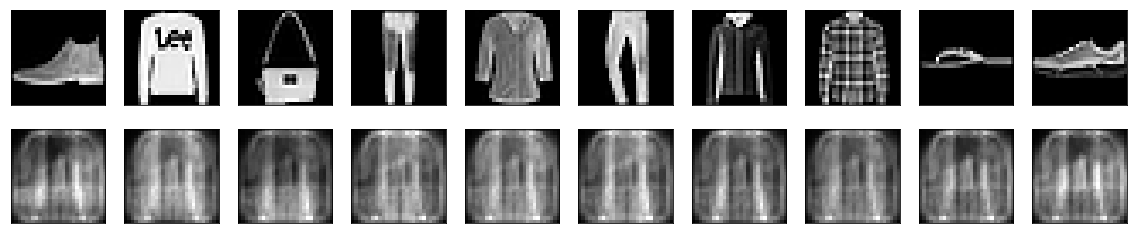

Dilated of the atom images of the decoder


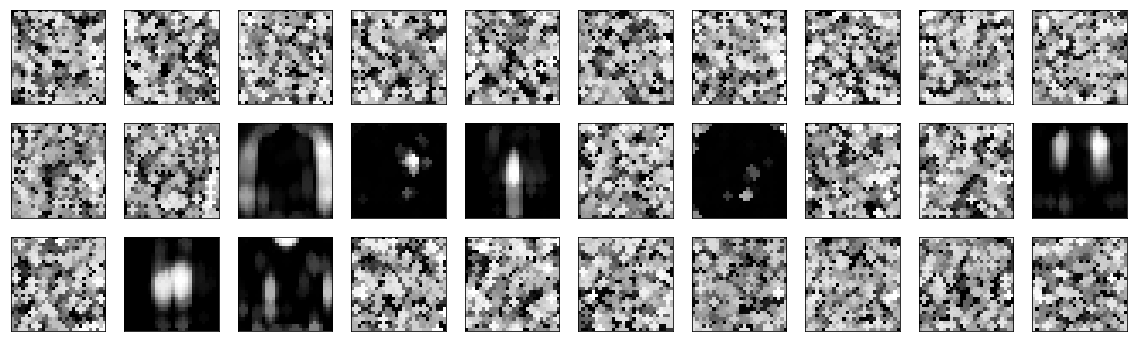

In [16]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.4 Sparsity_weight = 5 (sp_o = 0.6)

Original images and reconstructions - Reconstruction error:  0.032942586970329285


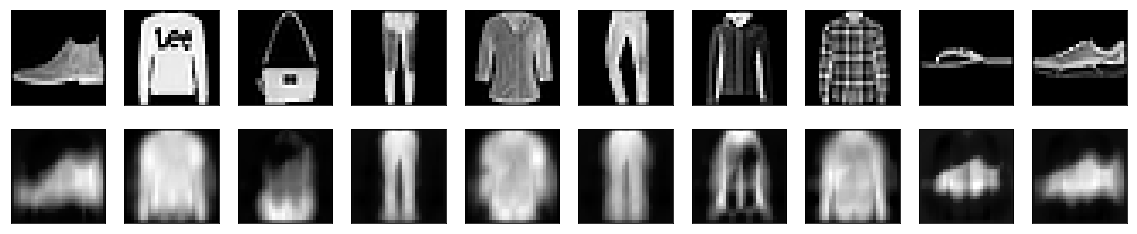

Histograms of the encodings - Sparsity (Hoyer):  0.6033839583396912


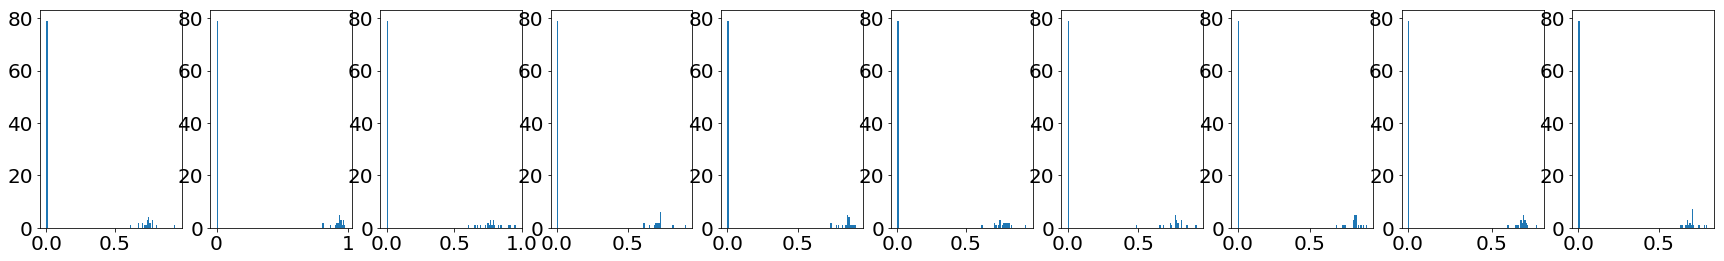

Atom images of the decoder


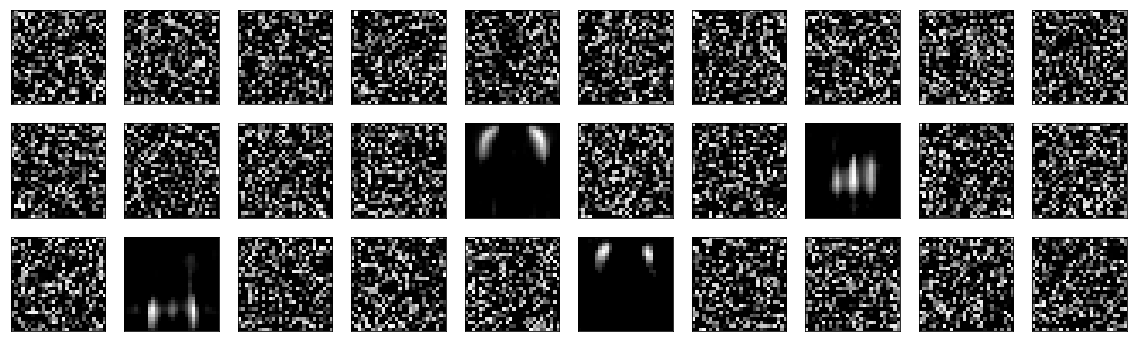

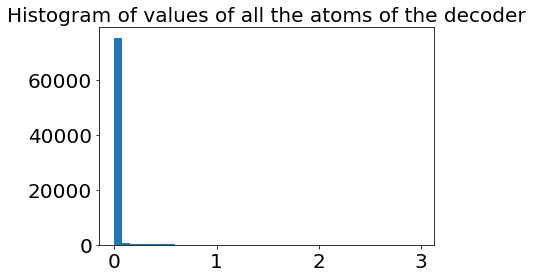

In [17]:
sp_o = 0.6
sp_w = 5
i = np.arange(4)[sparsity_weights==sp_w][0]
j = np.arange(1)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_Hoyer_NonNegConstraint.load('18_10_29_dim100_Hoyer_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


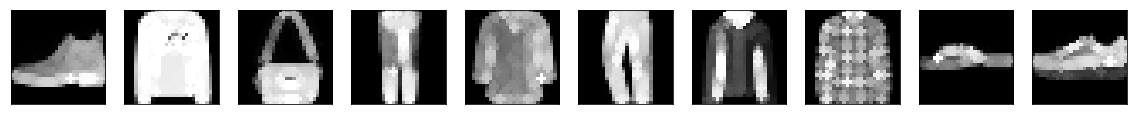

Dilatation of the reconstructions


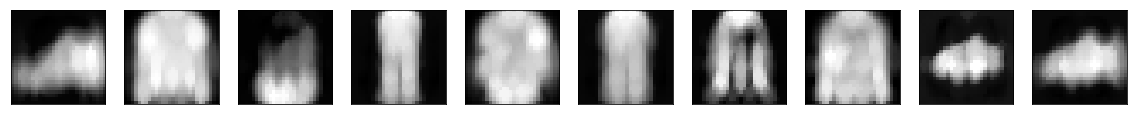

Original images and max-approximation to dilatation
Max-approx error to original:  1.3952885929107666  - Max-approx error to reconstruction:  1.5438926691055297


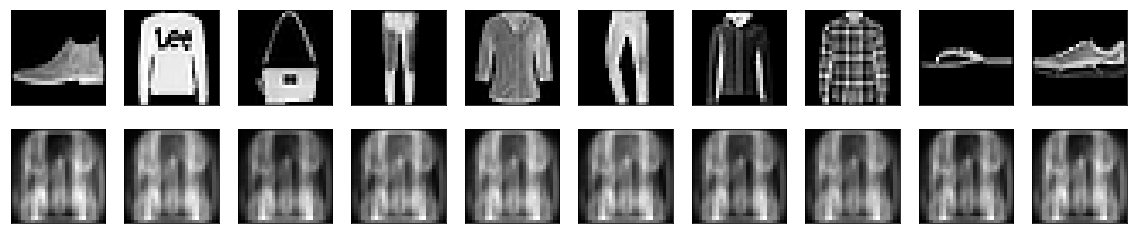

Dilated of the atom images of the decoder


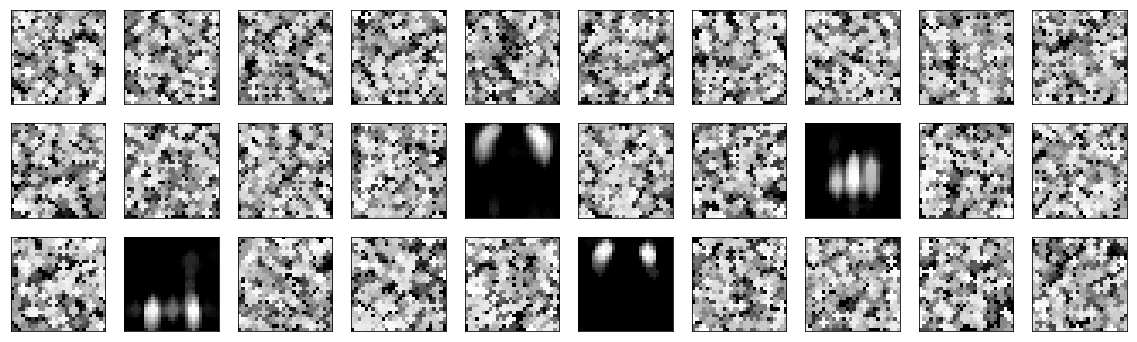

In [18]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)